# Truth Tables Using Perceptron Training Rule

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

### Create NAND Truth Tables in Panda Dataframe

In [11]:
nand_df = pd.DataFrame(np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 0]]),
                   columns=['x0', 'x1', 'y0'])
nand_df

,x0,x1,y0
0,0,0,1
1,0,1,1
2,1,0,1
3,1,1,0


### Need to offset so values in dataframe aren't zero

In [34]:
nand_df.loc[nand_df['x0'] == 0, 'x0'] = -1
nand_df.loc[nand_df['x1'] == 0, 'x1'] = -1
nand_df.loc[nand_df['y0'] == 0, 'y0'] = -1
nand_df

,x0,x1,y0
0,-1,-1,1
1,-1,1,1
2,1,-1,1
3,1,1,-1


### Neural Network for the NAND Function

### Weights

In [35]:
threshold = 0
n = .5 #Learning Rate

In [36]:
w1 = .6
w2 = .6
wi_xi_df=pd.DataFrame((nand_df['x0']*w1 +nand_df['x1']*w2), columns=['wi_xi'])
wi_xi_df   

,wi_xi
0,-1.2
1,0.0
2,0.0
3,1.2


In [37]:
wi_xi_df.loc[wi_xi_df["wi_xi"] >= threshold,  "output"] = 1
wi_xi_df.loc[wi_xi_df["wi_xi"] < threshold, "output"] = 0
wi_xi_df

,wi_xi,output
0,-1.2,0.0
1,0.0,1.0
2,0.0,1.0
3,1.2,1.0


### Those Training weights are wrong and the output is not what was expected.  Use 2 row to calculate new weights

### Perceptron Training Rule wi = wi + n(t-o)xi, wi = weights, n = learning rate, t = target, o = output, xi = xo or x1

In [38]:
t = nand_df['y0'].loc[2]
o = wi_xi_df['output'].loc[2]
xi0 = nand_df['x0'].loc[2]
xi1 = nand_df['x1'].loc[2]

In [39]:
w1_new = w1 + n * ((t-o) * xi0)
w2_new = w2 + n * ((t-o) * xi1)
print(w1_new)
print(w2_new)

0.6
0.6


### Try new weights

In [40]:
wi_xi_df=pd.DataFrame((nand_df['x0']*w1_new + nand_df['x1']*w2_new), columns=['wi_xi'])
wi_xi_df.loc[wi_xi_df["wi_xi"] >= threshold,  "output"] = 1
wi_xi_df.loc[wi_xi_df["wi_xi"] < threshold, "output"] = 0
wi_xi_df 

,wi_xi,output
0,-1.2,0.0
1,0.0,1.0
2,0.0,1.0
3,1.2,1.0


### Those weights didn't work correctly, calculate new weights

In [41]:
w1_new = w1_new + n * ((t-o) * xi0)
w2_new = w2_new + n * ((t-o) * xi1)
print(w1_new)
print(w2_new)

0.6
0.6


In [42]:
wi_xi_df=pd.DataFrame((nand_df['x0']*w1_new + nand_df['x1']*w2_new), columns=['wi_xi'])
wi_xi_df.loc[wi_xi_df["wi_xi"] >= threshold,  "output"] = 1
wi_xi_df.loc[wi_xi_df["wi_xi"] < threshold, "output"] = 0
wi_xi_df

,wi_xi,output
0,-1.2,0.0
1,0.0,1.0
2,0.0,1.0
3,1.2,1.0


### Those weights didn't work correctly, lets automate it to find the best weights

#### Put X and Y in a array

In [43]:
y = nand_df.iloc[0:4, 2].values
x = nand_df.iloc[0:4, [0, 1]].values
print(x)
print(y)

[[-1 -1]
 [-1  1]
 [ 1 -1]
 [ 1  1]]
[ 1  1  1 -1]


In [56]:
n_iter = 10 #Number of passes over dataset
errors_ = [] #Number of misclassifications in each epoch
w = (2, 2)
w = list(w)
w

[2, 2]

In [57]:
for _ in range(n_iter):
    errors = 0
    for xi, target in zip(x, y):
        net_input = (xi[0]*w[0] + xi[1]*w[1])
        predict = np.where(net_input >= 1, 1, 0)
        update = n * (target - predict)
        w[1] = w[1] + n * ((target - predict) * xi[1])
        w[0] = w[0] + n * ((target - predict) * xi[0])
        errors += int(update != 0.0)
    errors_.append(errors)

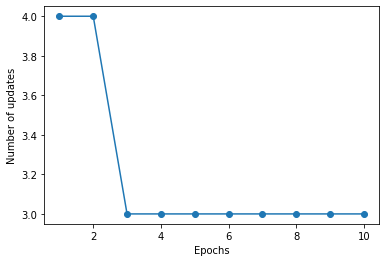

In [58]:
plt.plot(range(1, len(errors_) + 1), errors_, marker='o')

plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

### Best weights were found after 3 Epochs

In [59]:
print(w[0])
print(w[1])

-4.5
-4.5


### Lets test it

In [60]:
wi_xi_df=pd.DataFrame((nand_df['x0']*w[0] + nand_df['x1']*w[1]), columns=['wi_xi'])
wi_xi_df.loc[wi_xi_df["wi_xi"] >= threshold,  "output"] = 1
wi_xi_df.loc[wi_xi_df["wi_xi"] < threshold, "output"] = 0
wi_xi_df 

,wi_xi,output
0,9.0,1.0
1,0.0,1.0
2,0.0,1.0
3,-9.0,0.0


### It worked